# Chickweight Exploratory Data Analysis
- **Author**: Furkan Karabulut, fkarabu
- **Date**: 2024-03-21
- **Class**: CSC 295 002

In [64]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # arrays and matrices
import matplotlib.pyplot as plt # data visualization
import seaborn as sns


# Load the data
data = pd.read_csv('ChickWeight.csv')

# Display the first few rows of the data
data.head()

,Unnamed: 0,weight,Time,Chick,Diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1


In [65]:
data.dtypes # check the data types of the columns

Unnamed: 0    int64
weight        int64
Time          int64
Chick         int64
Diet          int64
dtype: object

In [66]:
data.describe() # summary statistics of the data

,Unnamed: 0,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000,578.000000
mean,289.500000,121.818339,10.717993,25.750865,2.235294
std,166.998503,71.071960,6.758400,14.568795,1.162678
min,1.000000,35.000000,0.000000,1.000000,1.000000
25%,145.250000,63.000000,4.000000,13.000000,1.000000
50%,289.500000,103.000000,10.000000,26.000000,2.000000
75%,433.750000,163.750000,16.000000,38.000000,3.000000
max,578.000000,373.000000,21.000000,50.000000,4.000000


In [67]:
chick_info_weight = data.groupby('Chick')['weight'].mean() # mean weight of each chick
chick_info_time = data.groupby('Chick')['Time'].mean() # mean time of each chick
chich_info_diet = data.groupby('Chick')['Diet'].mean() # mean diet of each chick

- Get how many unique chick we have in the data.

In [68]:
num_unique_chicks = data['Chick'].nunique()
num_unique_chicks 

50

- Get how many unique diet we have in the data.

In [69]:
num_unique_diet = data['Diet'].nunique()
num_unique_diet

4

- Get how many unique time we have in the data.

In [70]:
num_unique_time = data['Time'].nunique()
num_unique_time

12

- Calculate the size size for chick

In [71]:
chick_size = data.groupby('Chick').size()
chick_size

Chick
1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     11
9     12
10    12
11    12
12    12
13    12
14    12
15     8
16     7
17    12
18     2
19    12
20    12
21    12
22    12
23    12
24    12
25    12
26    12
27    12
28    12
29    12
30    12
31    12
32    12
33    12
34    12
35    12
36    12
37    12
38    12
39    12
40    12
41    12
42    12
43    12
44    10
45    12
46    12
47    12
48    12
49    12
50    12
dtype: int64

- Get the initial weight for each chick

In [72]:
# First, reset the index of initial_weights to make 'Chick' a column, not an index
initial_weights_df = initial_weights.reset_index()

# Now, merge using 'Chick' as the key
data = pd.merge(data, initial_weights_df, on='Chick')

# Calculate weight gain
data['weight_gain'] = data['weight'] - data['initial_weight']

# Display the first few rows to check if it's correct
data.head()


,Unnamed: 0,weight,Time,Chick,Diet,initial_weight,weight_gain
0,1,42,0,1,1,42,0
1,2,51,2,1,1,42,9
2,3,59,4,1,1,42,17
3,4,64,6,1,1,42,22
4,5,76,8,1,1,42,34


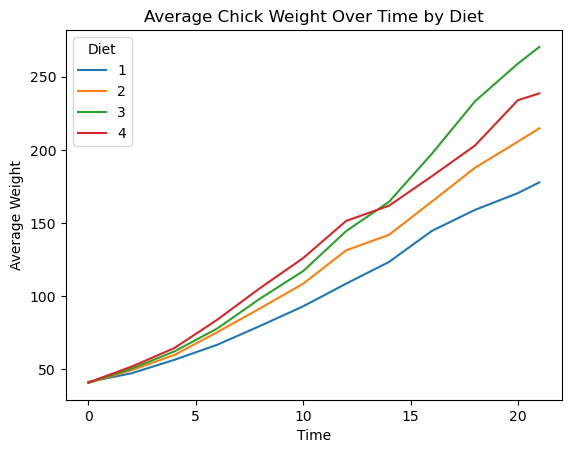

In [73]:
avg_weight_per_diet_over_time = data.groupby(['Diet', 'Time']).mean()['weight'].unstack(level=0)
avg_weight_per_diet_over_time.plot(title='Average Chick Weight Over Time by Diet')
plt.xlabel('Time')
plt.ylabel('Average Weight')
plt.show()

### Average Chick Weight Over Time by Diet

This line plot illustrates the average weight of chicks over time, categorized by the four different diets. The x-axis represents the number of days since birth, and the y-axis shows the average weight in grams. Each line corresponds to one of the diets, allowing for a direct comparison of how each diet influences weight gain over time. Key observations include:
- Diet 3 seems to promote the most rapid weight gain, especially after day 15.
- Chicks on Diet 1 show the slowest rate of weight gain throughout the study period.
- There is a notable increase in the weight variance for Diet 4 chicks as time progresses, indicating differential responses to this diet.


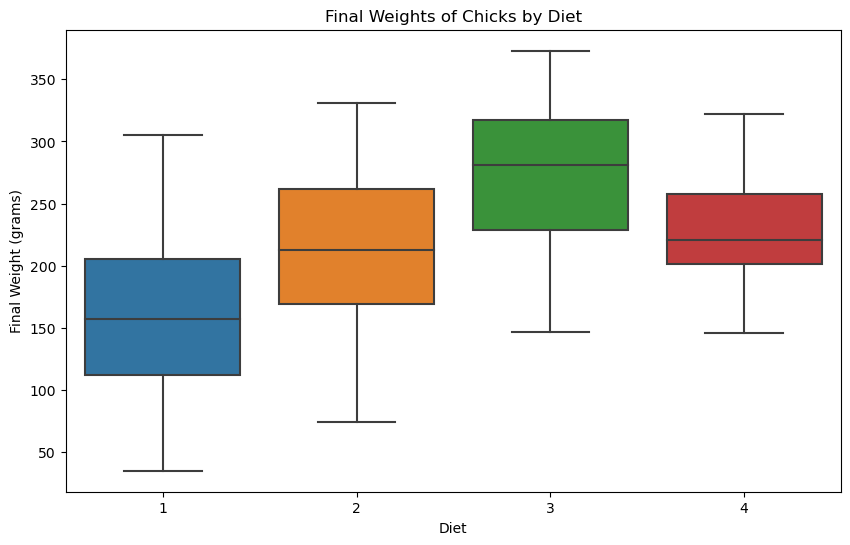

In [74]:
# Visualization 1: Box Plot of Final Weights by Diet
final_weights = data.sort_values(by='Time').groupby('Chick').last()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diet', y='weight', data=final_weights)
plt.title('Final Weights of Chicks by Diet')
plt.xlabel('Diet')
plt.ylabel('Final Weight (grams)')
plt.show()


### Final Weights of Chicks by Diet

The box plot depicts the distribution of final weights for chicks on each of the four diets. The central box represents the middle 50% of the data, with the median marked by a line inside the box. The "whiskers" extend to show the range of the data, and any points outside of this are considered outliers. Observations from this plot include:
- Diet 2 has the highest median final weight, suggesting it is quite effective overall.
- Diet 4 shows the greatest variability in final weight, with several outliers indicating that some chicks responded very well, while others did not.
- Diets 1 and 3 demonstrate similar performance, with Diet 3 having a slightly higher upper quartile.


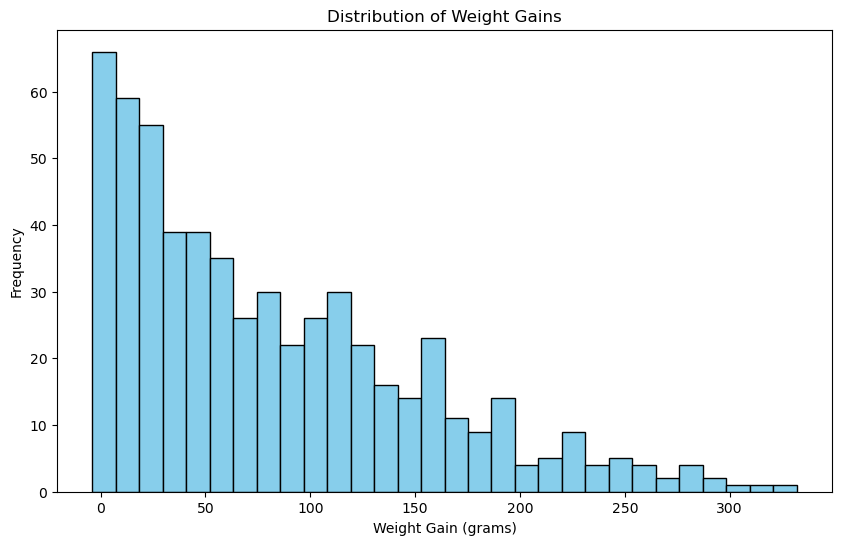

In [75]:
plt.figure(figsize=(10, 6))
plt.hist(data['weight_gain'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Weight Gains')
plt.xlabel('Weight Gain (grams)')
plt.ylabel('Frequency')
plt.show()

### Distribution of Weight Gains

The histogram shows the frequency distribution of weight gains among all the chicks during the study period. The x-axis represents the weight gain in grams, while the y-axis indicates the number of chicks that fall within each weight gain interval. The histogram highlights the following:
- A majority of chicks have a weight gain between 50 and 150 grams, indicating a common growth pattern.
- The distribution is right-skewed, meaning that there are a few chicks with exceptionally high weight gains.
- The spread of weight gains suggests varied growth rates, which could be due to individual differences or varying responses to the diets.
